In [3]:
# read a csv file
library(tidyverse)
setwd("/Users/haradamayu/InorganicAnalysis_2025")
data <- read_csv("data/InorganicAnalysis_WholeClass.csv", skip = 1)
head(data)

Rows: 24 Columns: 23
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Sample
dbl (22): Group, DAS, Fresh Weight (g), Dry Weight (g), Water Content, SPAD ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Group,Sample,DAS,Fresh Weight (g),Dry Weight (g),Water Content,SPAD Value,Fv/Fm,ΦII_GL,ΦII_HL,⋯,NO3-N (%),Share of NO3-N (%),NO3 (mg/kg FW),Total P (%),Pi (%),Share of Pi (%),K (%),NO3- (mM),Pi (mM),K+ (mM)
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,N150,32,71.70,3.92,17.3,34.2,0.774,0.426,0.195,⋯,1.32,22.5,3200,0.566,0.301,53.2,2.51,54.6,5.6,37.2
1,N250,32,81.70,5.05,15.2,43.1,0.784,0.549,0.308,⋯,1.17,20.6,3190,0.561,0.276,49.2,1.70,54.8,5.9,28.6
2,N150,25,47.96,2.94,15.3,36.3,0.761,0.665,0.329,⋯,1.69,26.0,4583,0.516,0.235,45.5,NA,77.6,5.0,NA
2,N250,25,42.85,2.68,15.0,42.1,0.792,0.704,0.514,⋯,1.84,24.0,5104,0.566,0.296,52.3,NA,86.4,6.4,NA
3,N150,32,70.78,4.63,14.3,44.4,0.754,0.558,0.332,⋯,0.79,18.0,2292,0.489,0.294,60.1,1.68,39.6,6.6,30.1
3,N250,32,78.19,5.11,14.3,47.1,0.754,0.590,0.378,⋯,1.15,20.9,3336,0.532,0.288,54.1,2.01,57.6,6.5,36.1


In [4]:
# wrangle the dataset
library(janitor)
library(dplyr)
library(tidyr)
data_wl <- data |>
    mutate(SampleLabel = str_c(Sample, "_", DAS, "d")) |>
    relocate(SampleLabel, .before = 4) |>
    dplyr::select(-Group, -Sample, -DAS) |>
    clean_names()
data_wl$sample_label <- as.factor(data_wl$sample_label)
head(data_wl)

sample_label,fresh_weight_g,dry_weight_g,water_content,spad_value,fv_fm,phii_gl,phii_hl,npq_gl,npq_hl,⋯,no3_n_percent,share_of_no3_n_percent,no3_mg_kg_fw,total_p_percent,pi_percent,share_of_pi_percent,k_percent,no3_m_m,pi_m_m,k_m_m
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
N150_32d,71.70,3.92,17.3,34.2,0.774,0.426,0.195,0.367,1.410,⋯,1.32,22.5,3200,0.566,0.301,53.2,2.51,54.6,5.6,37.2
N250_32d,81.70,5.05,15.2,43.1,0.784,0.549,0.308,0.412,1.460,⋯,1.17,20.6,3190,0.561,0.276,49.2,1.70,54.8,5.9,28.6
N150_25d,47.96,2.94,15.3,36.3,0.761,0.665,0.329,0.376,1.845,⋯,1.69,26.0,4583,0.516,0.235,45.5,NA,77.6,5.0,NA
N250_25d,42.85,2.68,15.0,42.1,0.792,0.704,0.514,0.148,0.661,⋯,1.84,24.0,5104,0.566,0.296,52.3,NA,86.4,6.4,NA
N150_32d,70.78,4.63,14.3,44.4,0.754,0.558,0.332,0.746,1.920,⋯,0.79,18.0,2292,0.489,0.294,60.1,1.68,39.6,6.6,30.1
N250_32d,78.19,5.11,14.3,47.1,0.754,0.590,0.378,0.819,1.794,⋯,1.15,20.9,3336,0.532,0.288,54.1,2.01,57.6,6.5,36.1


## Single Data Graph: DAS and N

In [5]:
# tukey-test
library(emmeans)
library(multcomp)
library(multcompView)
TukeyHSD(aov(fresh_weight_g ~ sample_label, data = data_wl))
res <- aov(fresh_weight_g ~ sample_label, data = data_wl) 
tuk <- glht(res, linfct = mcp(sample_label = "Tukey")) 
mltv <- cld(tuk, decreasing = F)
abc <- mltv[["mcletters"]][["Letters"]]

tukey_result <- data_wl |>
    group_by(sample_label) |>
    summarize(mean = mean(fresh_weight_g)) |>
    mutate(result = abc)
tukey_result

Welcome to emmeans.
Caution: You lose important information if you filter this package's results.
See '? untidy'

Loading required package: mvtnorm

Loading required package: survival

Loading required package: TH.data

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select



Attaching package: ‘TH.data’


The following object is masked from ‘package:MASS’:

    geyser




  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = fresh_weight_g ~ sample_label, data = data_wl)

$sample_label
                        diff        lwr        upr     p adj
N150_32d-N150_25d  25.445000  16.979119  33.910881 0.0000003
N250_25d-N150_25d   1.263333  -7.202548   9.729215 0.9748058
N250_32d-N150_25d  28.991667  20.525785  37.457548 0.0000000
N250_25d-N150_32d -24.181667 -32.647548 -15.715785 0.0000007
N250_32d-N150_32d   3.546667  -4.919215  12.012548 0.6503997
N250_32d-N250_25d  27.728333  19.262452  36.194215 0.0000001


sample_label,mean,result
<fct>,<dbl>,<chr>
N150_25d,46.96333,a
N150_32d,72.40833,b
N250_25d,48.22667,a
N250_32d,75.95500,b


In [6]:
# colour pallet
colour_code <- c("N150_25d" = "#62DF2F", 
                 "N150_32d" = "#429520", 
                 "N250_25d" = "#2FB8E3", 
                 "N250_32d" = "#207995")

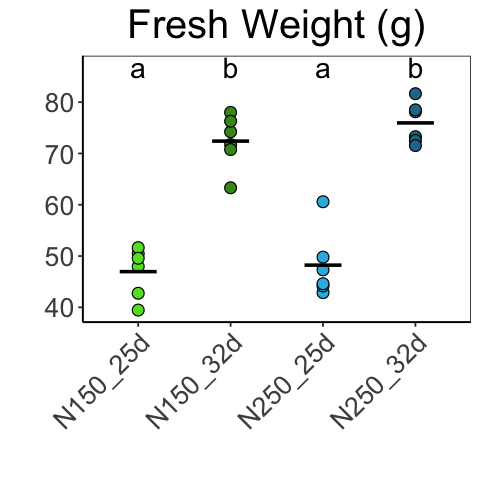

In [7]:
# draw a plot
library(ggplot2)
library(repr)
library(ggpubr)
options(repr.plot.width = 4, repr.plot.height = 4)
y_max <- max(data_wl$fresh_weight_g, na.rm = TRUE)

FW_plot <- data_wl |>
    ggplot(aes(x = sample_label, y = fresh_weight_g, fill = sample_label)) +
    geom_jitter(shape = 21, colour = "black", width = 0, size = 3) +
    stat_summary(fun = mean, geom = "crossbar", width = 0.4, fatten = 2, colour = "black") +
    geom_text(data = tukey_result, aes(x = sample_label, y = y_max + 5, label = result),
            size = 6, inherit.aes = FALSE) +
    labs(x = "", y = "", title = "Fresh Weight (g)") +
    scale_fill_manual(values = colour_code) +
    theme_bw() +  
    theme(
        text = element_text(size = 20, colour = "black"),
        axis.line = element_line(colour = "black"),
        axis.text.x = element_text(angle = 45, hjust = 1),  
        panel.grid = element_blank(),
        plot.title = element_text(hjust = 0.5),
        legend.position = "none"
    ) 
FW_plot

## Multiple Data Graph 1: DAS and N

In [8]:
# wrangle the data
data_long <- data_wl |>
    pivot_longer(cols = fresh_weight_g:k_m_m, names_to = "Variable", values_to = "Value") |>
    dplyr::select(sample_label:Value)
head(data_long)

sample_label,Variable,Value
<fct>,<chr>,<dbl>
N150_32d,fresh_weight_g,71.700
N150_32d,dry_weight_g,3.920
N150_32d,water_content,17.300
N150_32d,spad_value,34.200
N150_32d,fv_fm,0.774
N150_32d,phii_gl,0.426


In [9]:
library(emmeans)
library(multcomp)
library(multcompView)

cols_name <- c("fresh_weight_g", "dry_weight_g", "water_content", 
          "spad_value", "fv_fm", "phii_gl", "phii_hl", "npq_gl", "npq_hl", 
          "kjeldahl_n_percent", "no3_n_percent", "share_of_no3_n_percent", "no3_mg_kg_fw", 
          "total_p_percent", "pi_percent", "share_of_pi_percent", "k_percent", 
          "no3_m_m", "pi_m_m", "k_m_m")

cols_tbl <- tibble(cols_name) |>
    mutate(cols_name = str_c(cols_name)) 
head(cols_tbl)

cols_name
<chr>
fresh_weight_g
dry_weight_g
water_content
spad_value
fv_fm
phii_gl


In [10]:
# make a tibble for tukey results
abc_result <- map(cols_name, function(col) {
  res <- aov(reformulate("sample_label", response = col), data = data_wl)
  tuk <- glht(res, linfct = mcp(sample_label = "Tukey"))
  mltv <- cld(tuk, decreasing = FALSE)
  letters <- mltv[["mcletters"]][["Letters"]]
  return(letters)
})

abc_result <- tibble::as_tibble(abc_result, .name_repair = "minimal")
colnames(abc_result) <- cols_tbl$cols_name
abc_result

tukey_result2 <- data_wl |>
    group_by(sample_label) |>
    summarize(across(fresh_weight_g:k_m_m, mean, na.rm = TRUE)) |>
    mutate(abc_result) |>
    dplyr::select(sample_label, fresh_weight_g:k_m_m) |>
    pivot_longer(cols = fresh_weight_g:k_m_m, names_to = "Variable", values_to = "result")
head(tukey_result2)

fresh_weight_g,dry_weight_g,water_content,spad_value,fv_fm,phii_gl,phii_hl,npq_gl,npq_hl,kjeldahl_n_percent,no3_n_percent,share_of_no3_n_percent,no3_mg_kg_fw,total_p_percent,pi_percent,share_of_pi_percent,k_percent,no3_m_m,pi_m_m,k_m_m
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
a,a,ab,a,a,a,a,a,a,a,a,ab,ab,a,a,a,a,ab,a,a
b,b,b,a,a,a,a,a,a,b,b,c,c,a,a,a,b,c,a,a
a,a,a,a,a,a,a,a,a,c,c,a,a,a,a,a,a,a,a,a
b,b,b,a,a,a,a,a,a,d,ab,bc,bc,a,a,a,b,bc,a,a


Warning message:
“There was 1 warning in `summarize()`.
ℹ In argument: `across(fresh_weight_g:k_m_m, mean, na.rm = TRUE)`.
ℹ In group 1: `sample_label = N150_25d`.
Caused by warning:
! The `...` argument of `across()` is deprecated as of dplyr 1.1.0.
Supply arguments directly to `.fns` through an anonymous function instead.

  # Previously
  across(a:b, mean, na.rm = TRUE)

  # Now
  across(a:b, \(x) mean(x, na.rm = TRUE))”


sample_label,Variable,result
<fct>,<chr>,<chr>
N150_25d,fresh_weight_g,a
N150_25d,dry_weight_g,a
N150_25d,water_content,ab
N150_25d,spad_value,a
N150_25d,fv_fm,a
N150_25d,phii_gl,a


In [11]:
data_max <- data_wl |>
    dplyr::select(fresh_weight_g:k_m_m) |>
    map_dfr(max, na.rm = TRUE)
vec_max <- as.numeric(data_max[1, ])
vec_max_rep <- as.vector(matrix(rep(vec_max, each = 4), nrow = 20, byrow = TRUE))

In [12]:
# colour pallet
colour_code <- c("N150_25d" = "#62DF2F", 
                 "N150_32d" = "#429520", 
                 "N250_25d" = "#2FB8E3", 
                 "N250_32d" = "#207995")

Warning message:
“Removed 4 rows containing non-finite outside the scale range
(`stat_summary()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_point()`).”


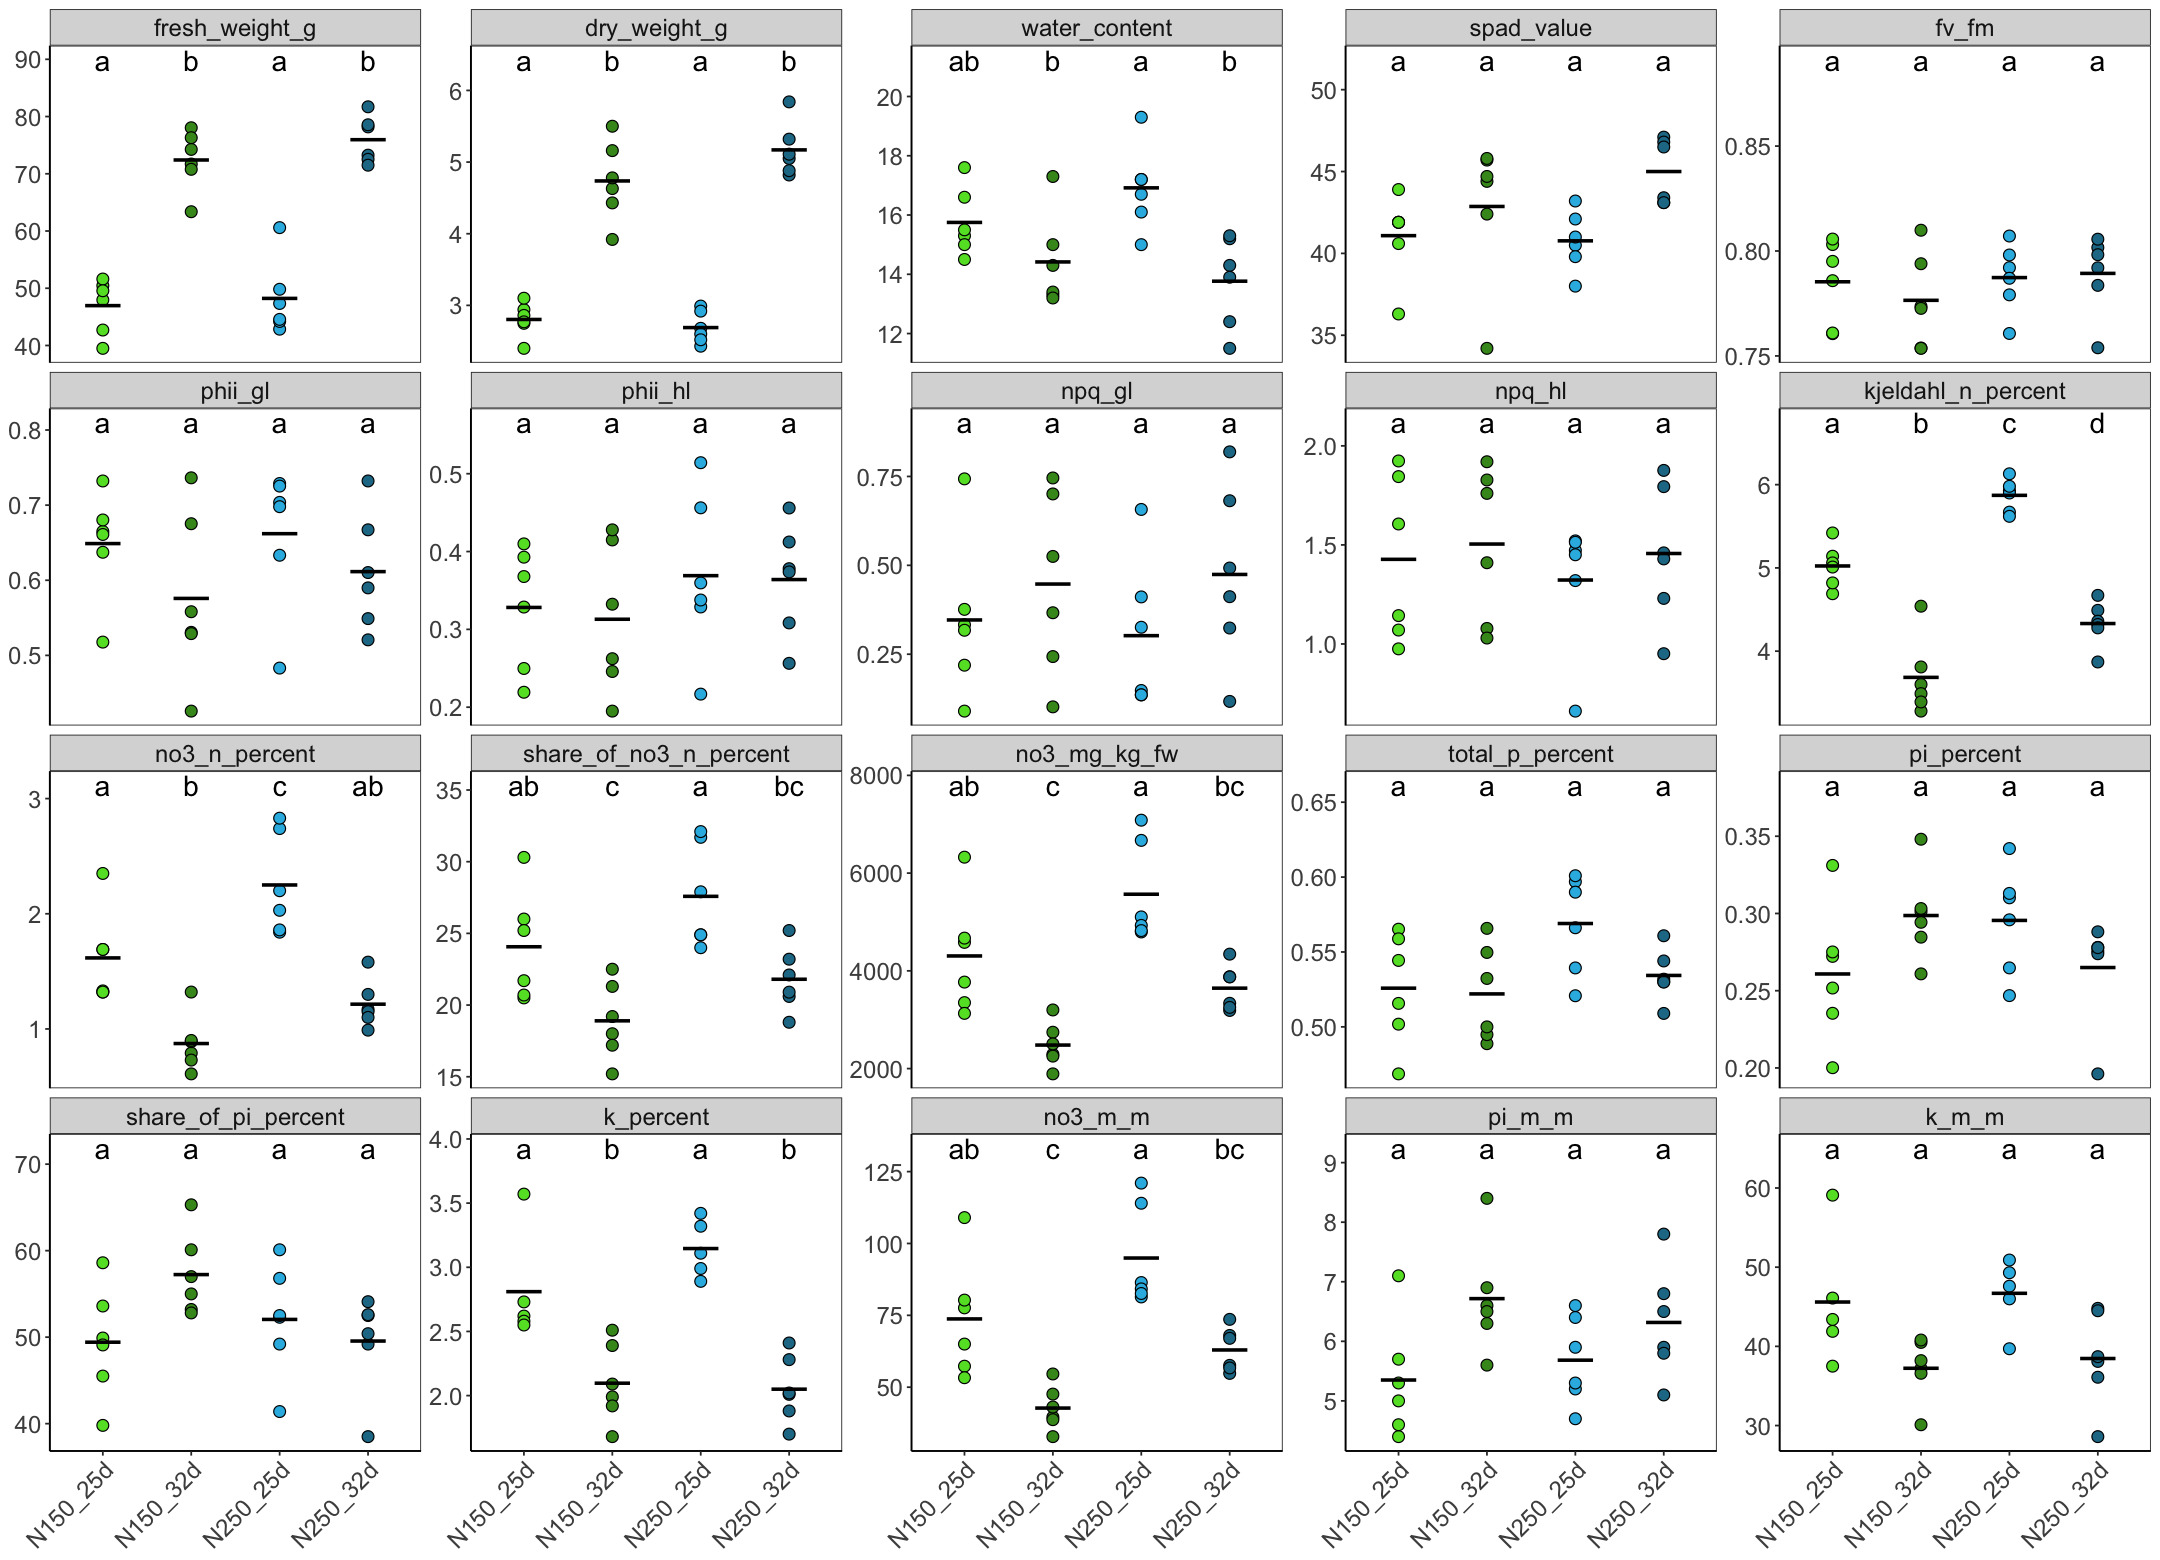

In [13]:
# draw a plot
library(ggplot2)
library(repr)
library(ggpubr)
options(repr.plot.width = 18, repr.plot.height = 13)

variable_order <- unique(data_long$Variable)
data_long$Variable <- factor(data_long$Variable, levels = variable_order)
tukey_result2$Variable <- factor(tukey_result2$Variable, levels = variable_order)

facet_plot <- data_long |>
    ggplot(aes(x = sample_label, y = Value, fill = sample_label)) +
    geom_jitter(shape = 21, colour = "black", width = 0, size = 3) +
    stat_summary(fun = mean, geom = "crossbar", width = 0.4, fatten = 2, colour = "black") +
    geom_text(data = tukey_result2, aes(x = sample_label, y = vec_max_rep + vec_max_rep/10, label = result),
            size = 6, inherit.aes = FALSE) +
    facet_wrap(~ Variable, scales = "free_y") +
    labs(x = NULL, y = NULL) +
    scale_fill_manual(values = colour_code) +
    theme_bw() +
    theme(text = element_text(size = 18),
          axis.text.x = element_text(angle = 45, hjust = 1),
          axis.line = element_line(colour = "black"),
          panel.grid = element_blank(),
          plot.title = element_text(hjust = 0.5),
          legend.position = "none") 
facet_plot  

## Multiple Data Graph 2: DAS

In [14]:
head(data)

Group,Sample,DAS,Fresh Weight (g),Dry Weight (g),Water Content,SPAD Value,Fv/Fm,ΦII_GL,ΦII_HL,⋯,NO3-N (%),Share of NO3-N (%),NO3 (mg/kg FW),Total P (%),Pi (%),Share of Pi (%),K (%),NO3- (mM),Pi (mM),K+ (mM)
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,N150,32,71.70,3.92,17.3,34.2,0.774,0.426,0.195,⋯,1.32,22.5,3200,0.566,0.301,53.2,2.51,54.6,5.6,37.2
1,N250,32,81.70,5.05,15.2,43.1,0.784,0.549,0.308,⋯,1.17,20.6,3190,0.561,0.276,49.2,1.70,54.8,5.9,28.6
2,N150,25,47.96,2.94,15.3,36.3,0.761,0.665,0.329,⋯,1.69,26.0,4583,0.516,0.235,45.5,NA,77.6,5.0,NA
2,N250,25,42.85,2.68,15.0,42.1,0.792,0.704,0.514,⋯,1.84,24.0,5104,0.566,0.296,52.3,NA,86.4,6.4,NA
3,N150,32,70.78,4.63,14.3,44.4,0.754,0.558,0.332,⋯,0.79,18.0,2292,0.489,0.294,60.1,1.68,39.6,6.6,30.1
3,N250,32,78.19,5.11,14.3,47.1,0.754,0.590,0.378,⋯,1.15,20.9,3336,0.532,0.288,54.1,2.01,57.6,6.5,36.1


In [15]:
data_das <- data |>
    dplyr::select(-Group, -Sample) |>
    mutate(DAS = str_c(DAS, "d")) |>
    clean_names() |>
    pivot_longer(cols = fresh_weight_g:k_m_m, names_to = "Variable", values_to = "Value")
head(data_das)

das,Variable,Value
<chr>,<chr>,<dbl>
32d,fresh_weight_g,71.700
32d,dry_weight_g,3.920
32d,water_content,17.300
32d,spad_value,34.200
32d,fv_fm,0.774
32d,phii_gl,0.426


In [24]:
# define the position of p.signif
data_das_max <- data_das |>
    group_by(Variable) |>
    summarize(p.signif_pos = max(Value, na.rm = TRUE)*1.1) |>
    ungroup()

# define the order
variable_order_das <- unique(data_das$Variable)
data_das$Variable <- factor(data_das$Variable, levels = variable_order_das)
data_das_max$Variable <- factor(data_das_max$Variable, levels = variable_order_das)
data_das_max

Variable,p.signif_pos
<fct>,<dbl>
fresh_weight_g,89.8700
dry_weight_g,6.4240
water_content,21.2300
spad_value,51.8100
fv_fm,0.8910
phii_gl,0.8096
phii_hl,0.5654
npq_gl,0.9009
npq_hl,2.1164


Warning message in stat_compare_means(method = "t.test", label = "p.signif", size = 5, :
“Ignoring unknown parameters: `labe.y.npc`”
Warning message:
“Removed 4 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 4 rows containing non-finite outside the scale range
(`stat_compare_means()`).”


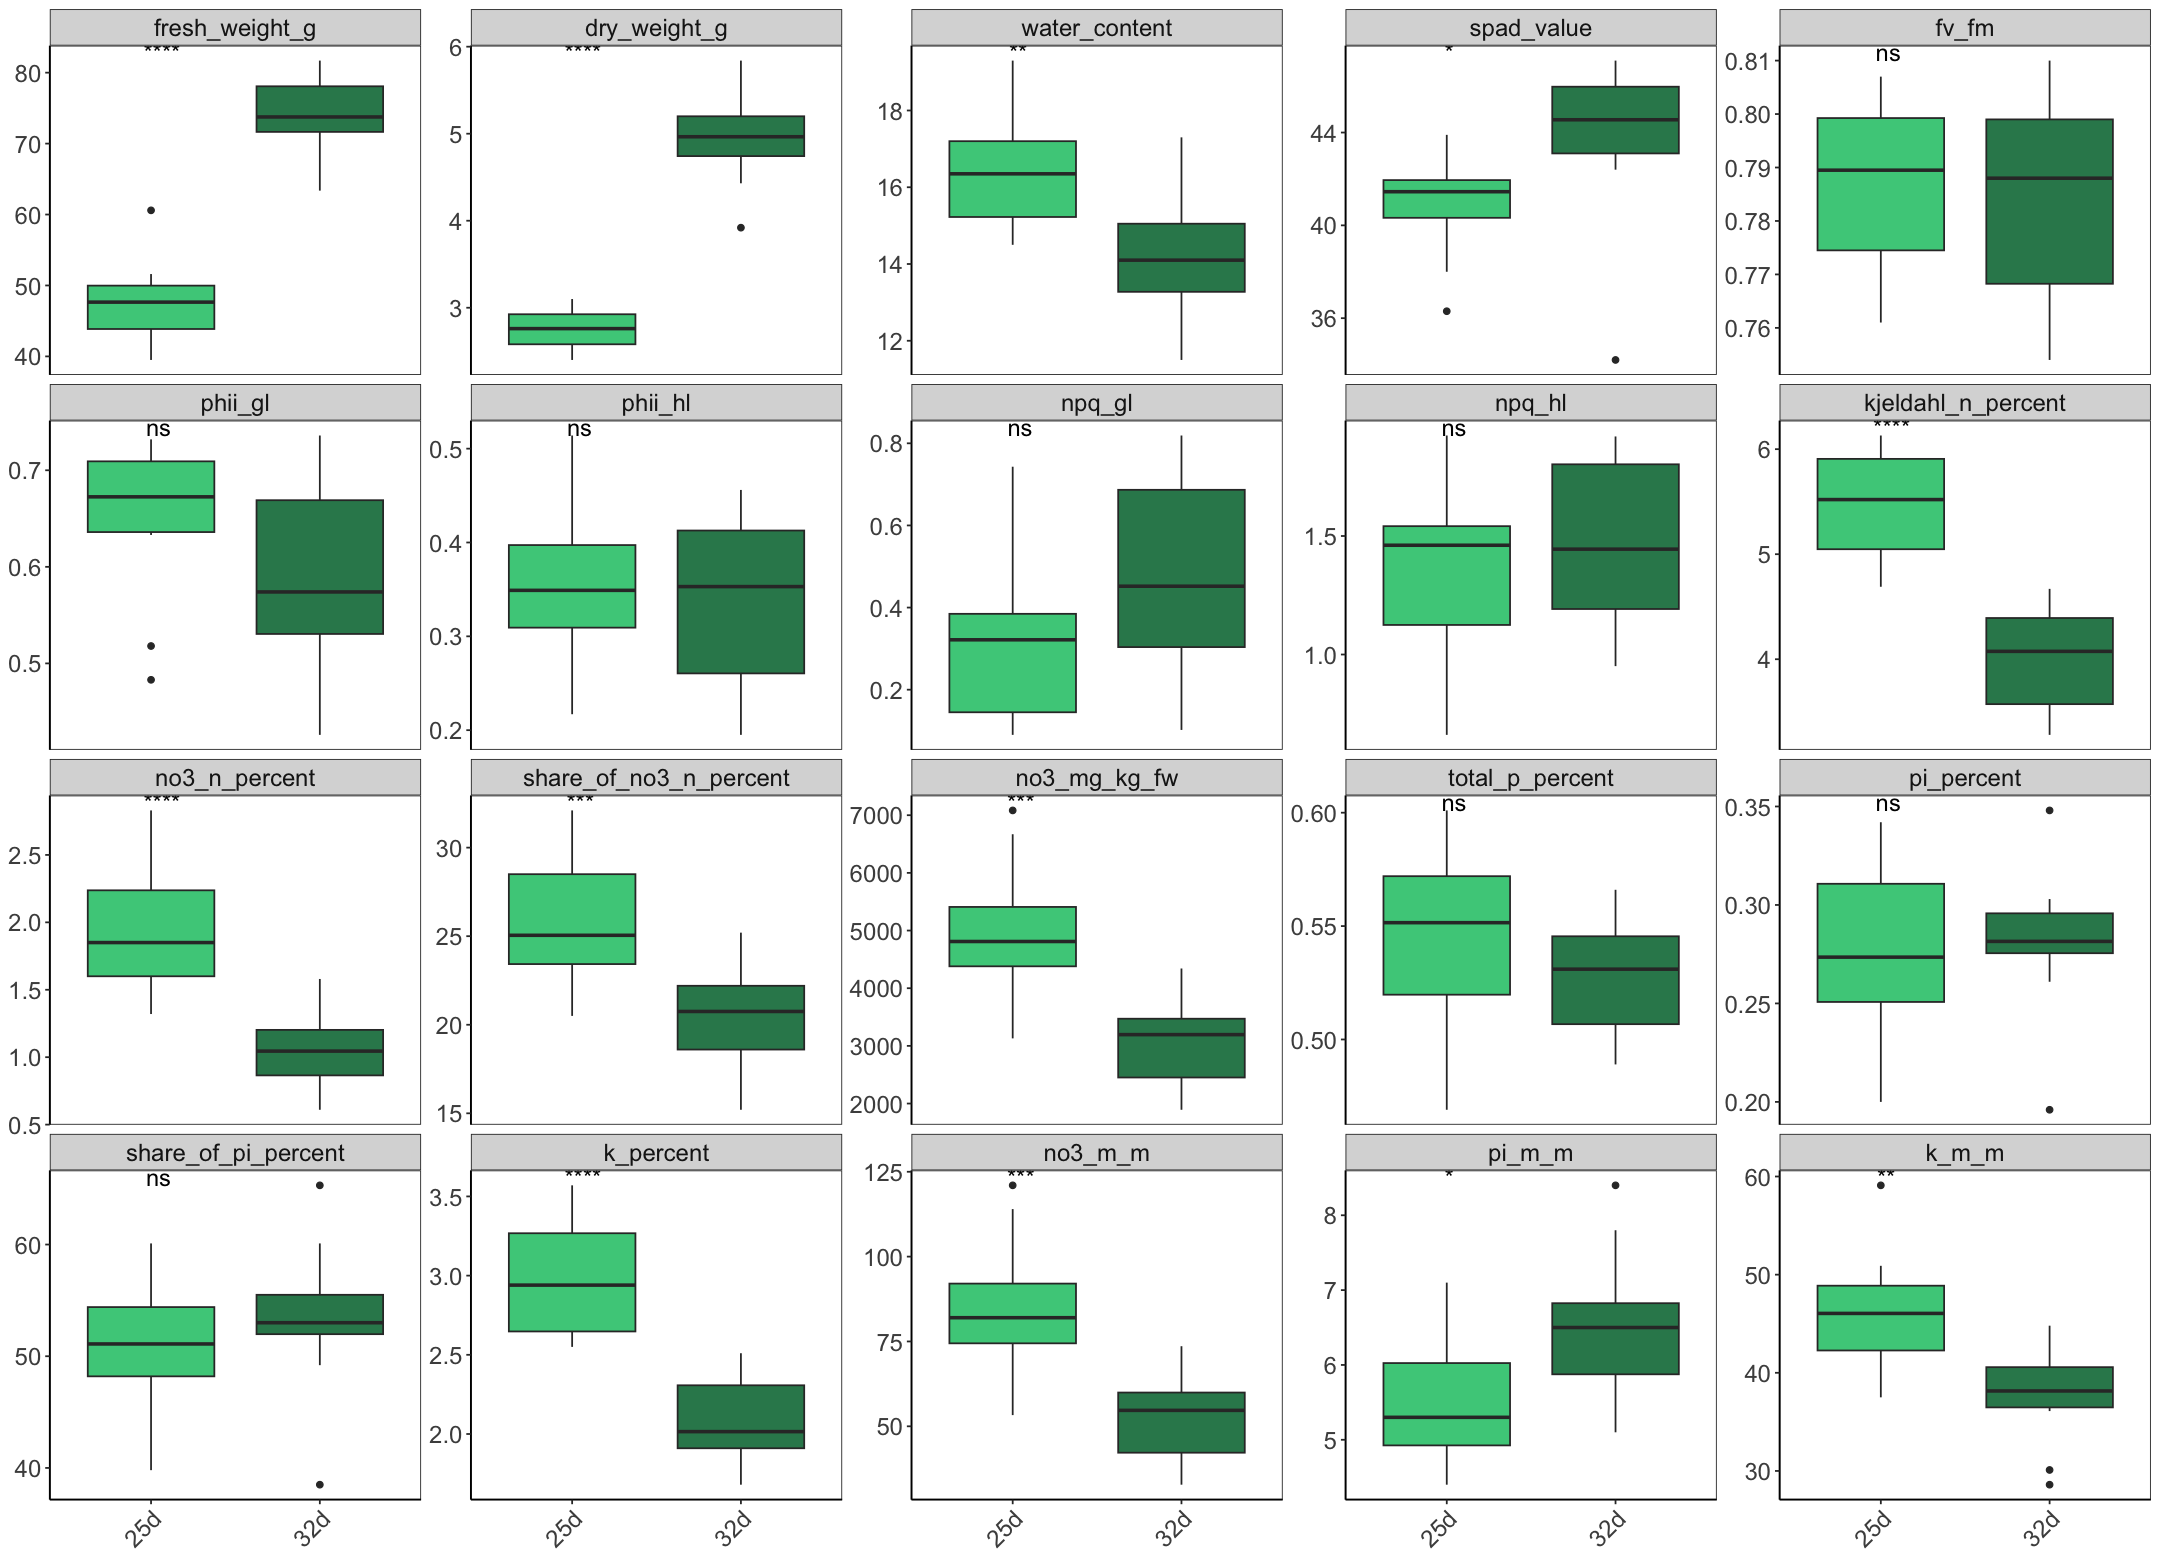

In [26]:
library(ggplot2)
library(repr)
library(ggpubr)
options(repr.plot.width = 18, repr.plot.height = 13)

# colour pallet
colour_code2 <- c("25d" = "#49CC89", "32d" = "#31875B")

# draw a plot
das_plot <- data_das |>
    ggplot(aes(x = das, y = Value, fill = das)) +
    geom_boxplot() +
    stat_compare_means(method = "t.test", 
                       label = "p.signif", 
                       size = 5,
                       labe.y.npc = "top") +
    facet_wrap(~ Variable, scales = "free_y") +
    labs(x = NULL, y = NULL) +
    scale_fill_manual(values = colour_code2) +
    theme_bw() +
    theme(text = element_text(size = 18),
          axis.text.x = element_text(angle = 45, hjust = 1),
          axis.line = element_line(colour = "black"),
          panel.grid = element_blank(),
          plot.title = element_text(hjust = 0.5),
          legend.position = "none") 
das_plot

## Multiple Data Graph 3: N

In [14]:
head(data)

Group,Sample,DAS,Fresh Weight (g),Dry Weight (g),Water Content,SPAD Value,Fv/Fm,ΦII_GL,ΦII_HL,⋯,NO3-N (%),Share of NO3-N (%),NO3 (mg/kg FW),Total P (%),Pi (%),Share of Pi (%),K (%),NO3- (mM),Pi (mM),K+ (mM)
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,N150,32,71.70,3.92,17.3,34.2,0.774,0.426,0.195,⋯,1.32,22.5,3200,0.566,0.301,53.2,2.51,54.6,5.6,37.2
1,N250,32,81.70,5.05,15.2,43.1,0.784,0.549,0.308,⋯,1.17,20.6,3190,0.561,0.276,49.2,1.70,54.8,5.9,28.6
2,N150,25,47.96,2.94,15.3,36.3,0.761,0.665,0.329,⋯,1.69,26.0,4583,0.516,0.235,45.5,NA,77.6,5.0,NA
2,N250,25,42.85,2.68,15.0,42.1,0.792,0.704,0.514,⋯,1.84,24.0,5104,0.566,0.296,52.3,NA,86.4,6.4,NA
3,N150,32,70.78,4.63,14.3,44.4,0.754,0.558,0.332,⋯,0.79,18.0,2292,0.489,0.294,60.1,1.68,39.6,6.6,30.1
3,N250,32,78.19,5.11,14.3,47.1,0.754,0.590,0.378,⋯,1.15,20.9,3336,0.532,0.288,54.1,2.01,57.6,6.5,36.1


In [27]:
data_n <- data |>
    dplyr::select(-Group, -DAS) |>
    clean_names() |>
    pivot_longer(cols = fresh_weight_g:k_m_m, names_to = "Variable", values_to = "Value")
head(data_n)

sample,Variable,Value
<chr>,<chr>,<dbl>
N150,fresh_weight_g,71.700
N150,dry_weight_g,3.920
N150,water_content,17.300
N150,spad_value,34.200
N150,fv_fm,0.774
N150,phii_gl,0.426


In [28]:
# define the position of p.signif
data_n_max <- data_n |>
    group_by(Variable) |>
    summarize(p.signif_pos = max(Value, na.rm = TRUE)*1.1) |>
    ungroup()

# define the order
variable_order_n <- unique(data_n$Variable)
data_n$Variable <- factor(data_n$Variable, levels = variable_order_n)
data_n_max$Variable <- factor(data_n_max$Variable, levels = variable_order_n)
data_n_max

Variable,p.signif_pos
<fct>,<dbl>
dry_weight_g,6.4240
fresh_weight_g,89.8700
fv_fm,0.8910
k_m_m,65.0100
k_percent,3.9270
kjeldahl_n_percent,6.7430
no3_m_m,133.1000
no3_mg_kg_fw,7791.3000
no3_n_percent,3.1130


Warning message in stat_compare_means(method = "t.test", label = "p.signif", size = 5, :
“Ignoring unknown parameters: `labe.y.npc`”
Warning message:
“Removed 4 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 4 rows containing non-finite outside the scale range
(`stat_compare_means()`).”


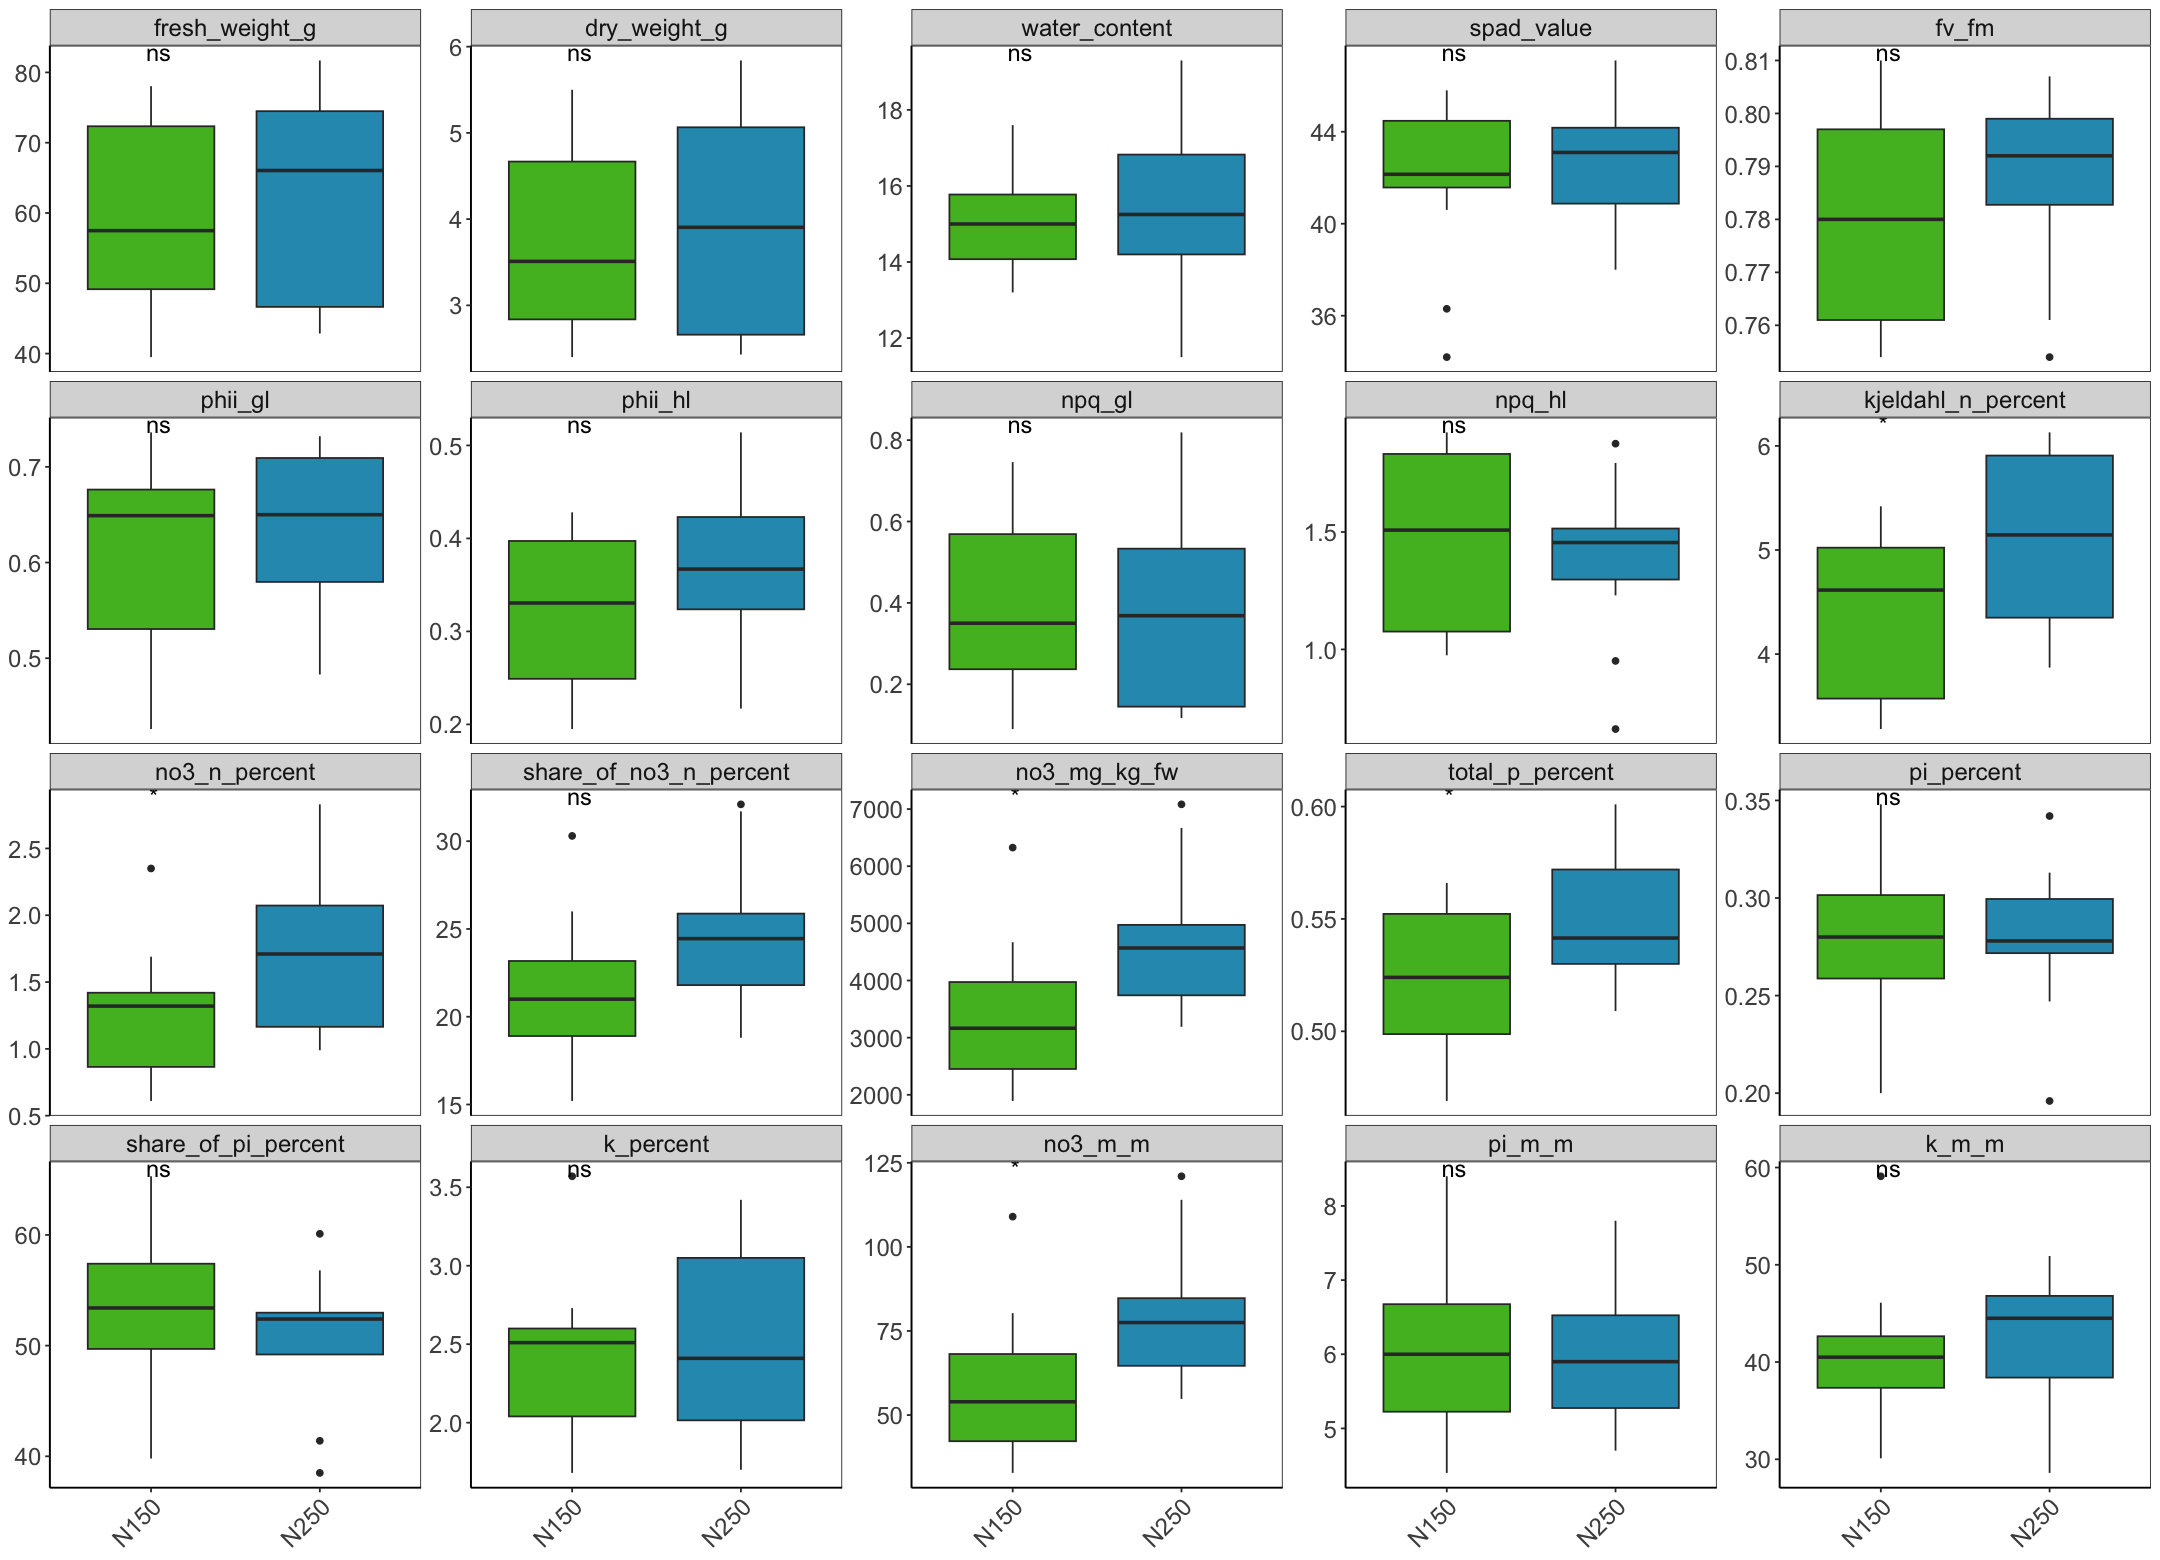

In [31]:
library(ggplot2)
library(repr)
library(ggpubr)
options(repr.plot.width = 18, repr.plot.height = 13)

# colour pallet
colour_code3 <- c("N150" = "#52BA28", "N250" = "#2899BC")

# draw a plot
n_plot <- data_n |>
    ggplot(aes(x = sample, y = Value, fill = sample)) +
    geom_boxplot() +
    stat_compare_means(method = "t.test", 
                       label = "p.signif", 
                       size = 5,
                       labe.y.npc = "top") +
    facet_wrap(~ Variable, scales = "free_y") +
    labs(x = NULL, y = NULL) +
    scale_fill_manual(values = colour_code3) +
    theme_bw() +
    theme(text = element_text(size = 18),
          axis.text.x = element_text(angle = 45, hjust = 1),
          axis.line = element_line(colour = "black"),
          panel.grid = element_blank(),
          plot.title = element_text(hjust = 0.5),
          legend.position = "none") 
n_plot

Warning message:
“Removed 4 rows containing non-finite outside the scale range
(`stat_summary()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 4 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 4 rows containing non-finite outside the scale range
(`stat_compare_means()`).”


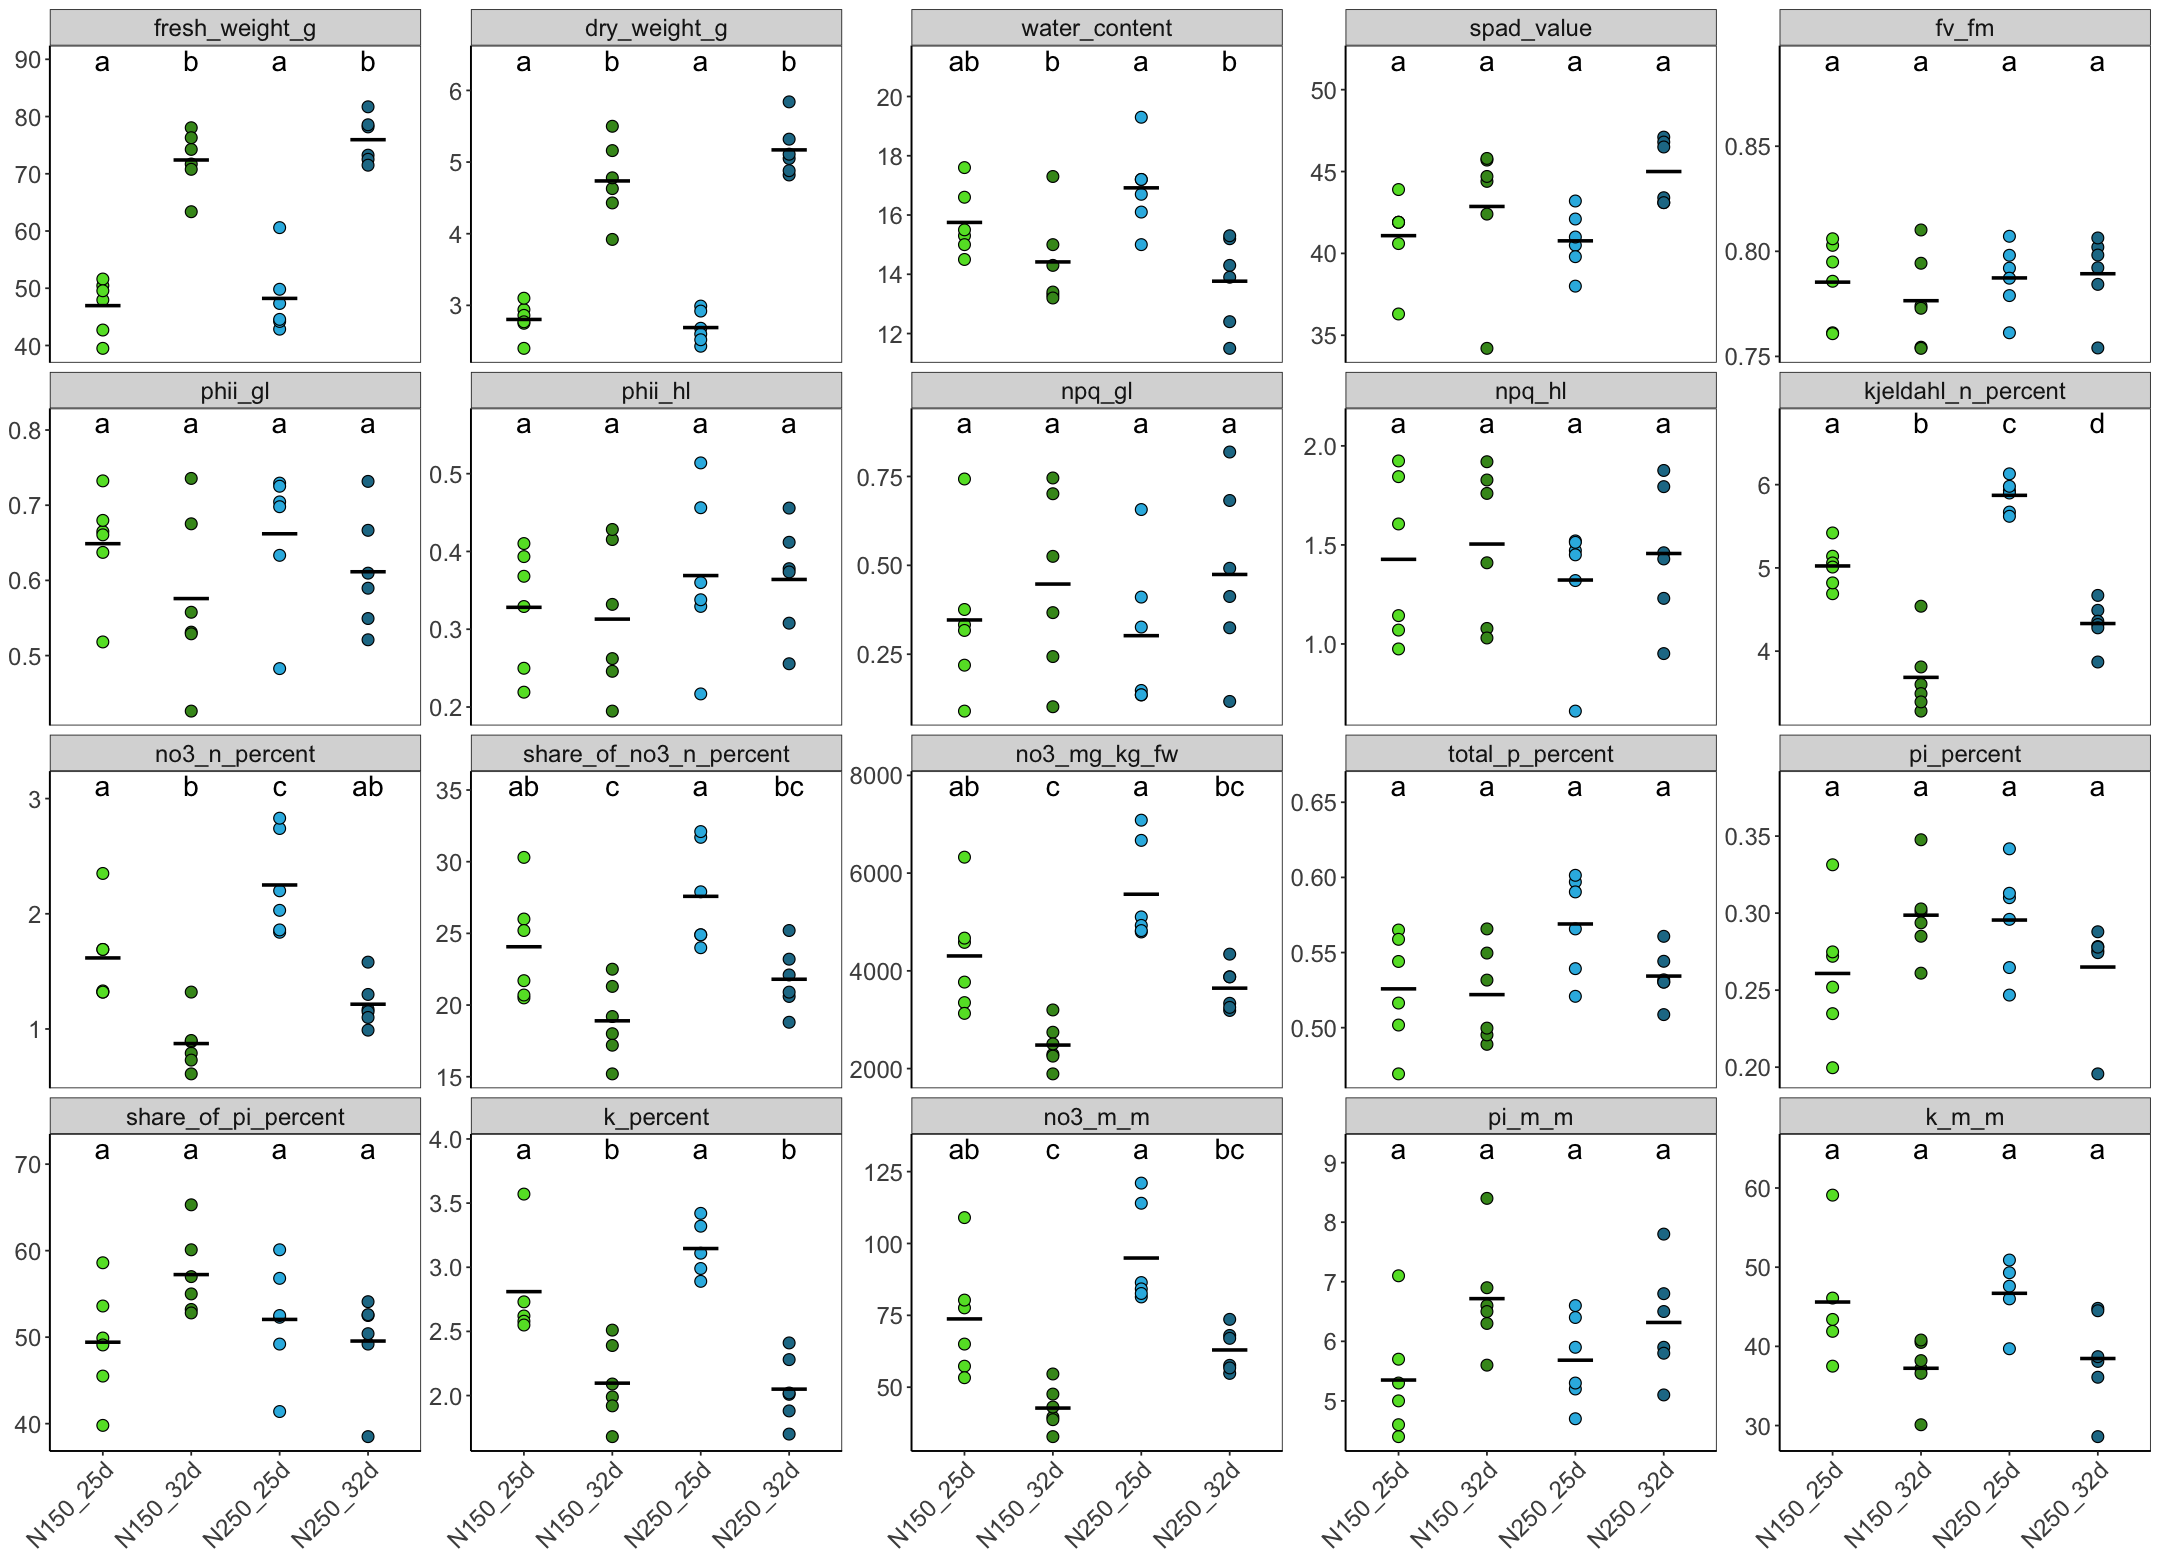

Warning message:
“Removed 4 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 4 rows containing non-finite outside the scale range
(`stat_compare_means()`).”


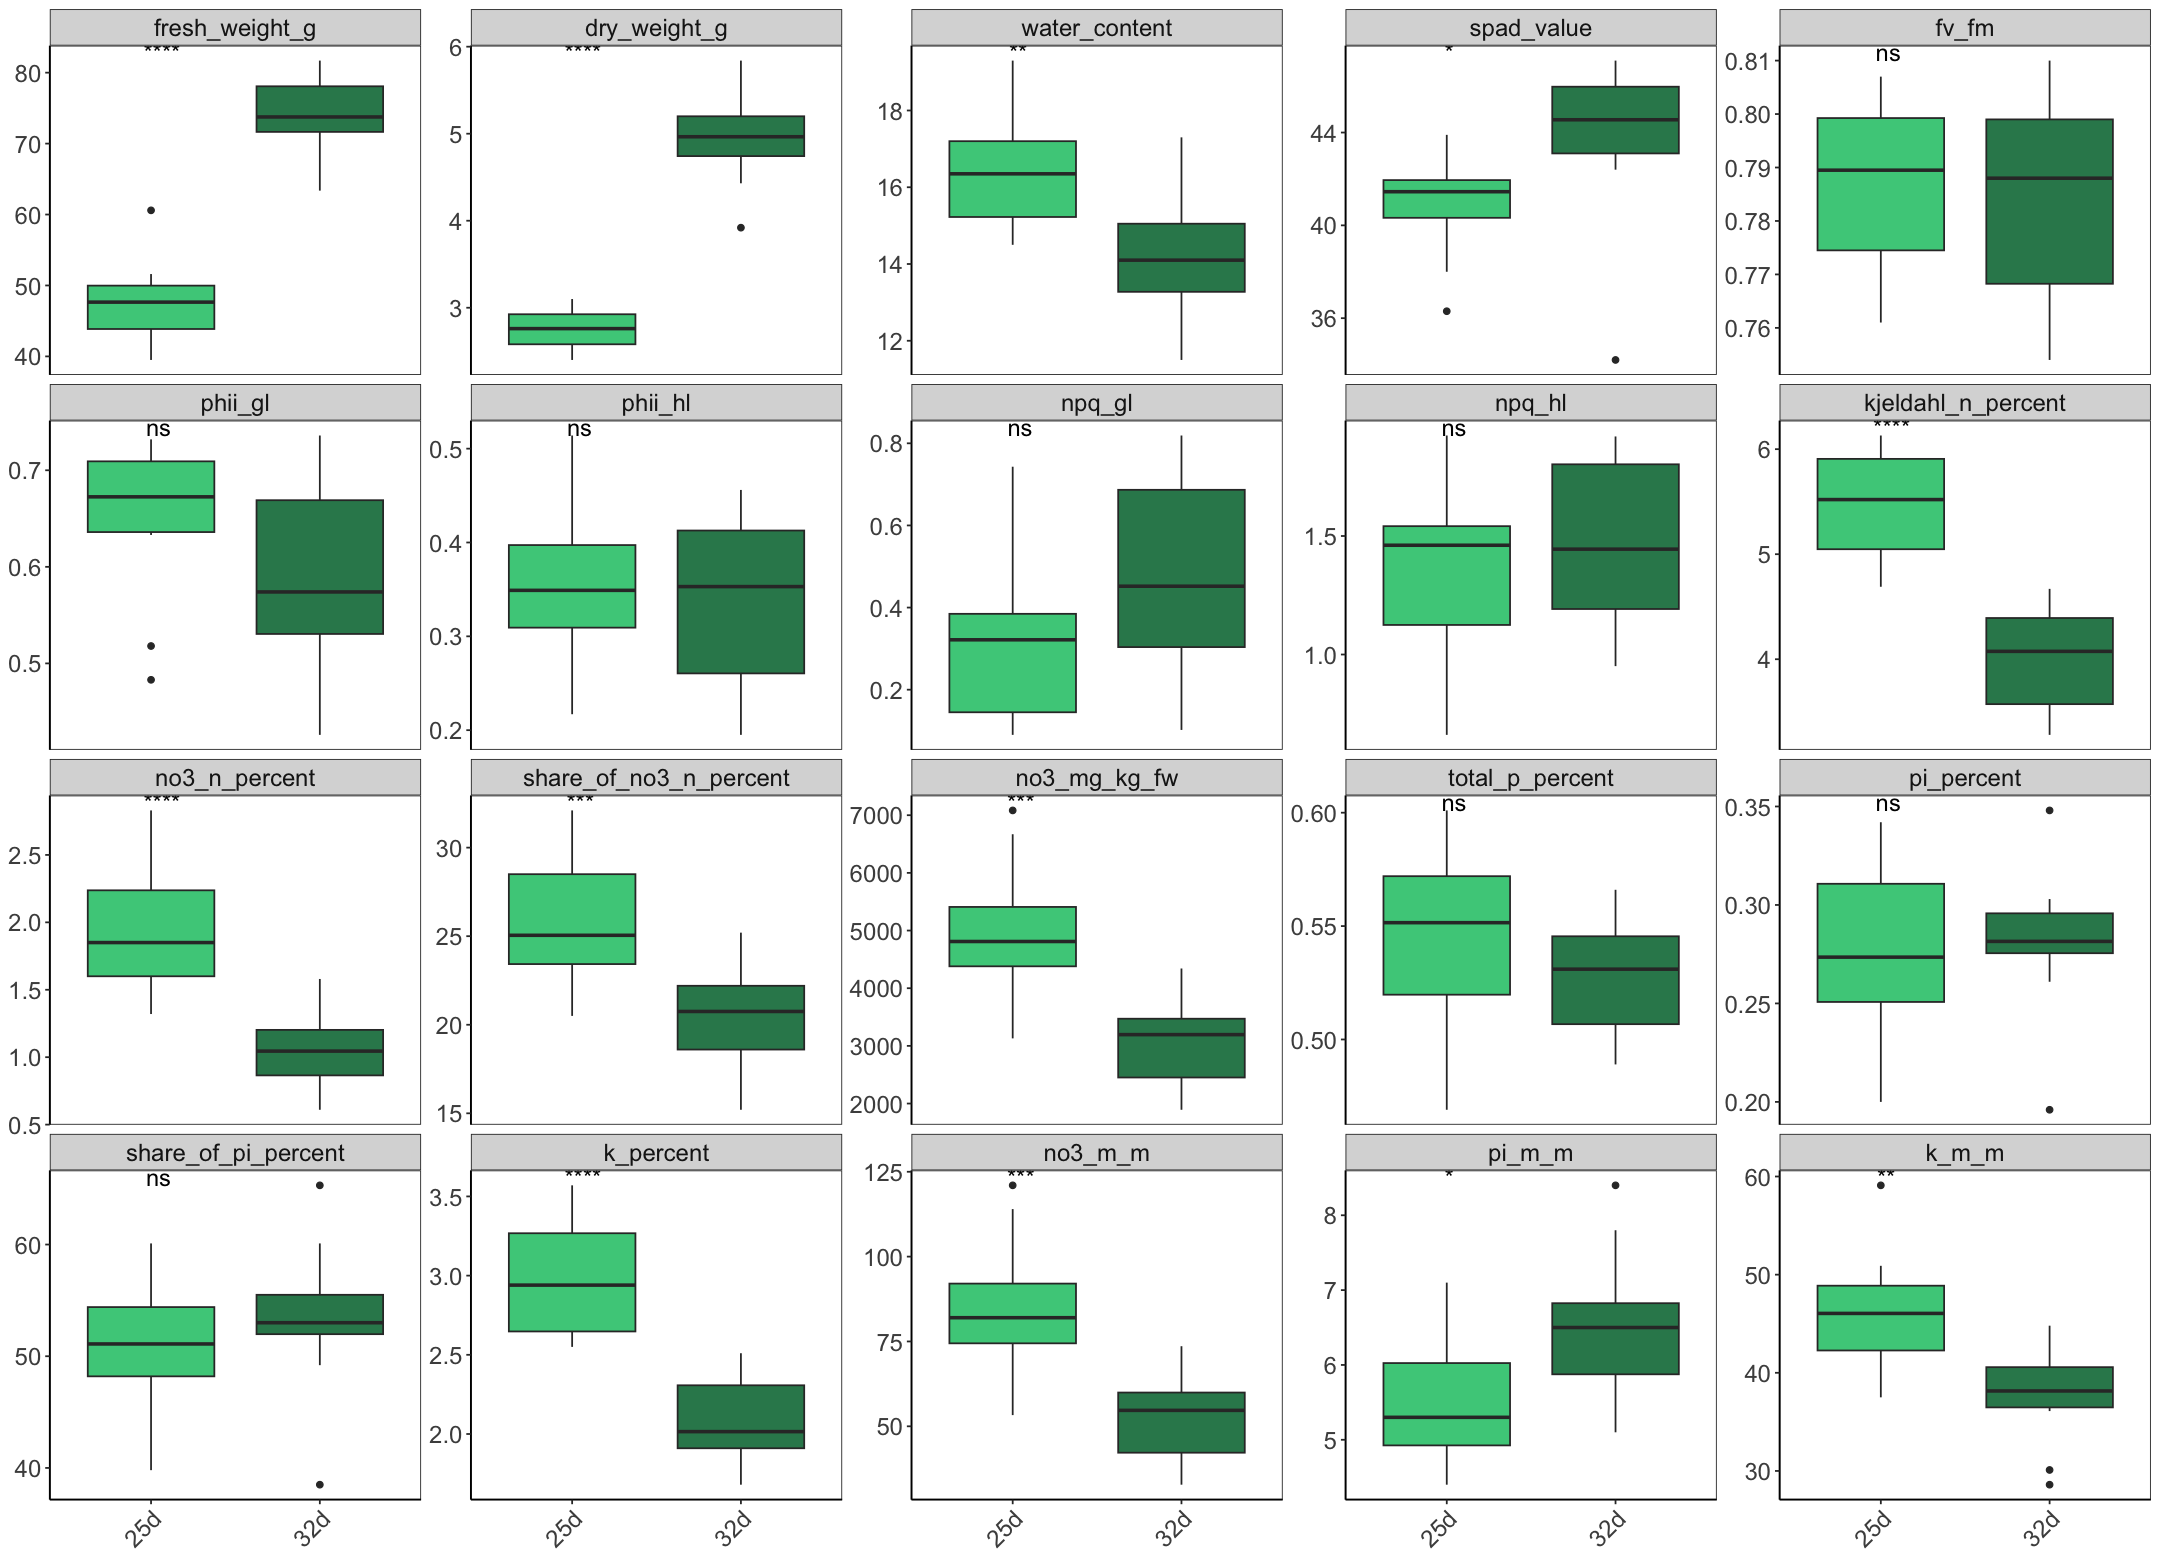

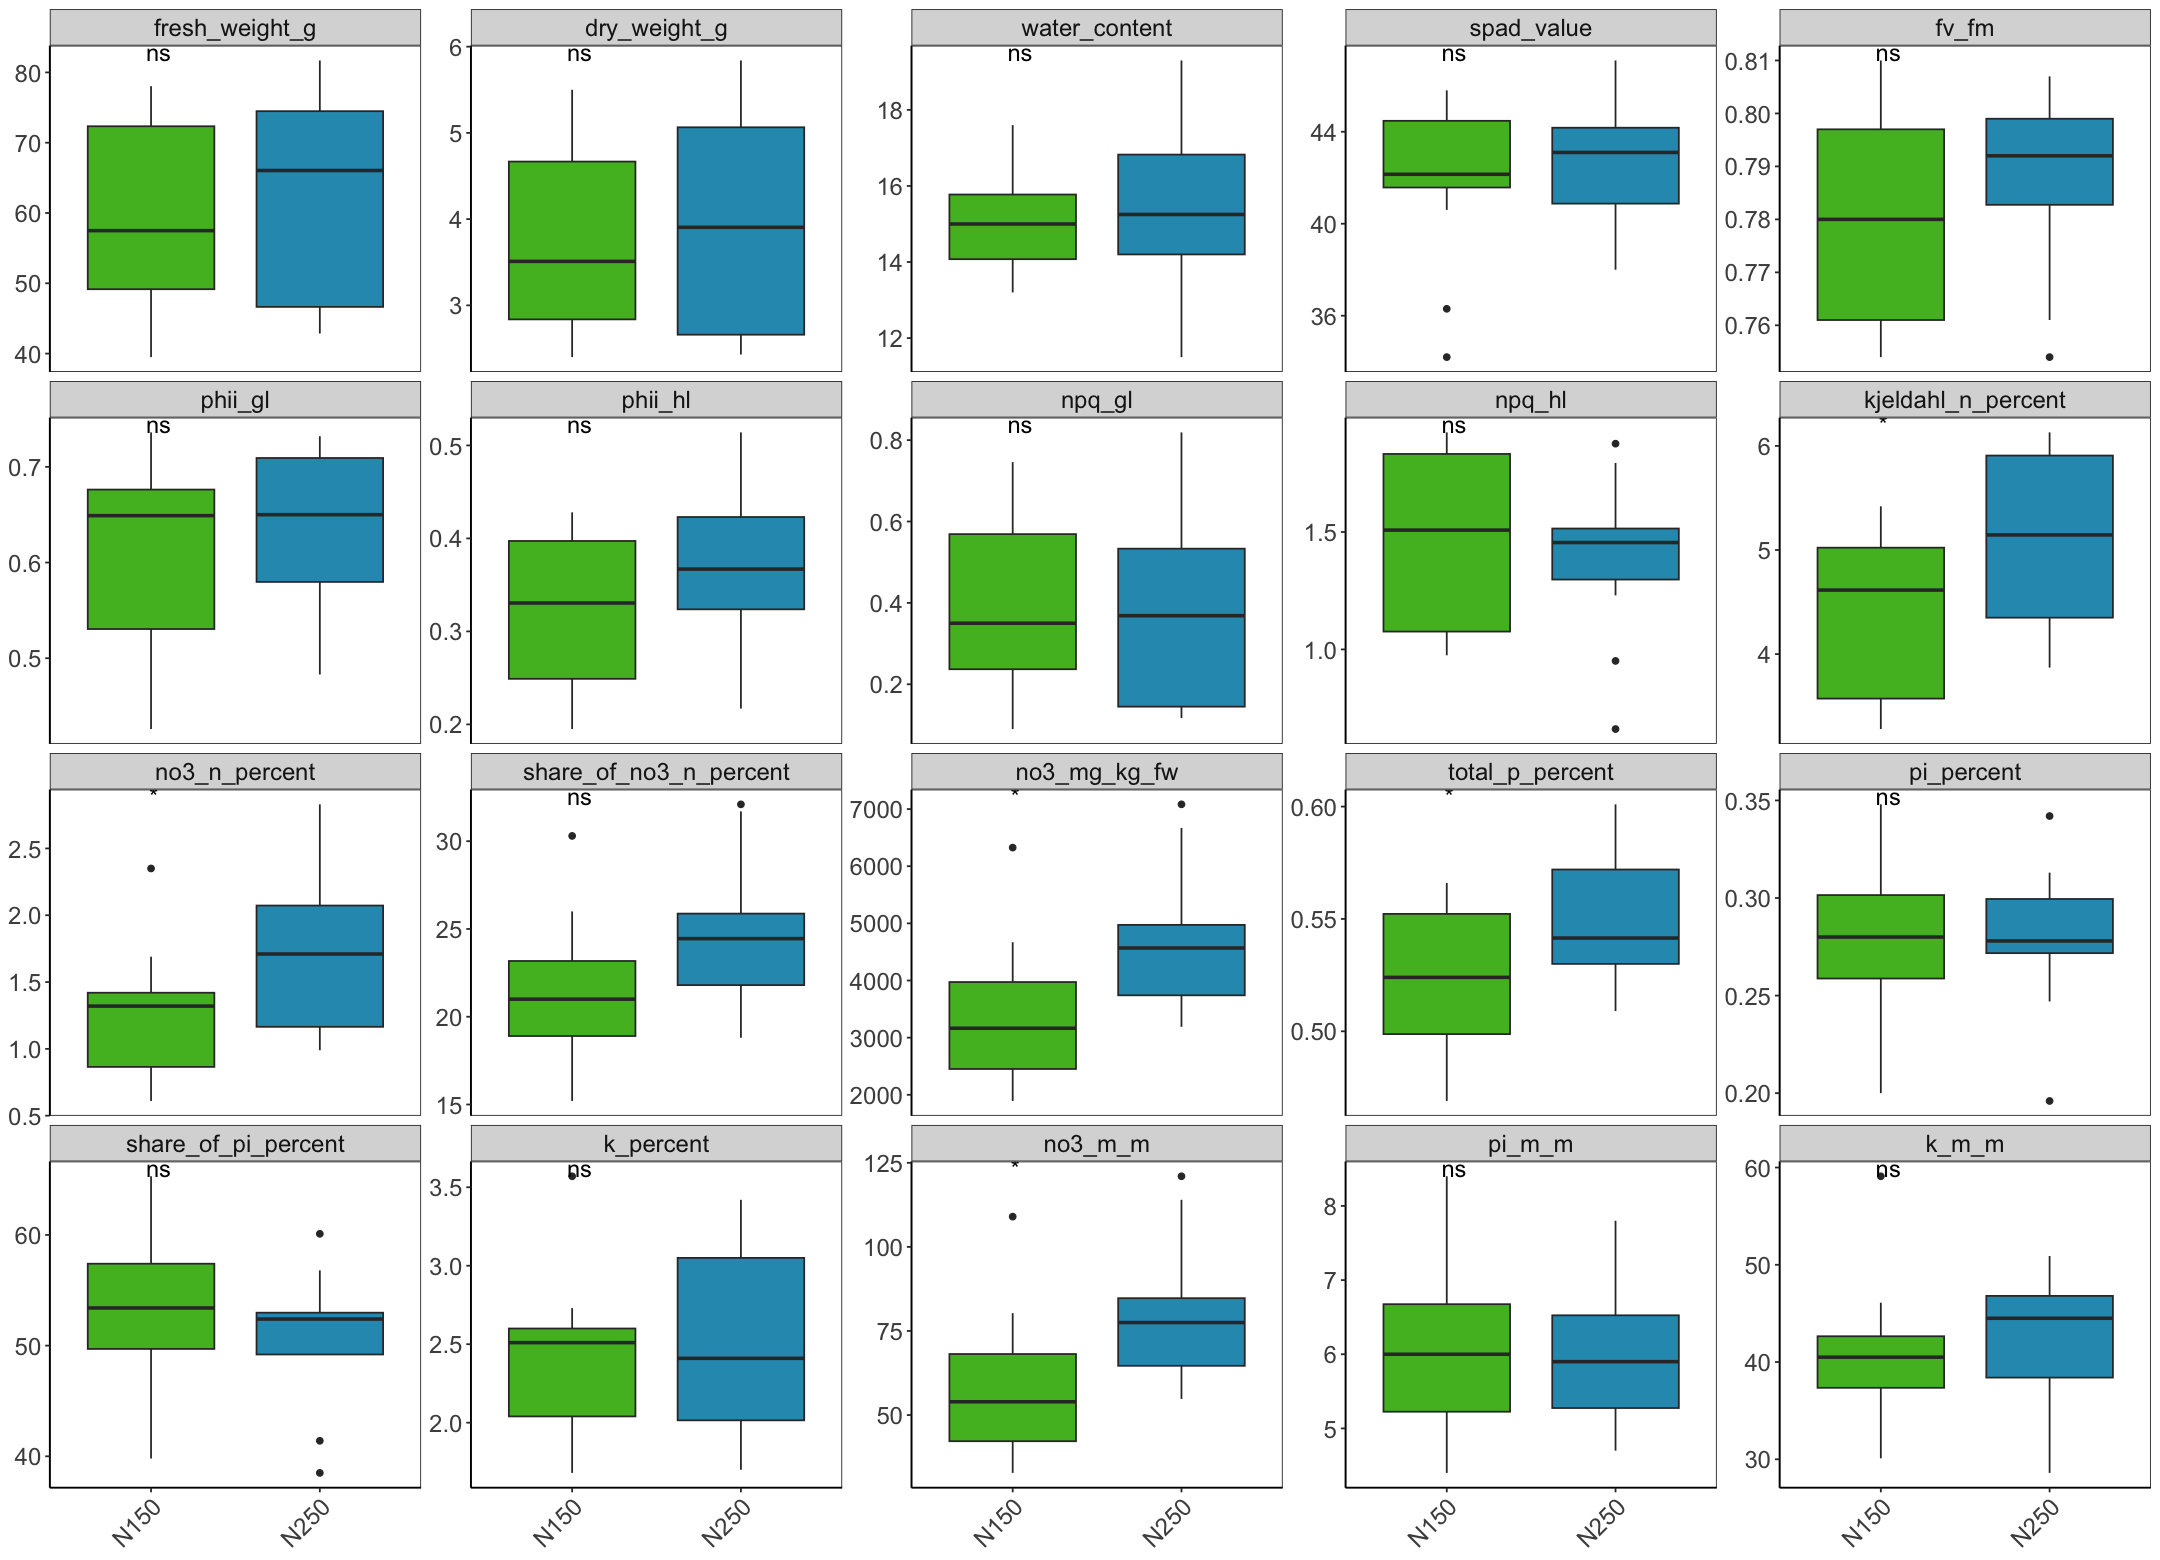

In [32]:
facet_plot
das_plot
n_plot

In [36]:
ggsave("all_plot.png", plot = facet_plot, width = 18, height = 13, dpi = 300)

Warning message:
“Removed 4 rows containing non-finite outside the scale range
(`stat_summary()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_point()`).”
